In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList')

In [6]:
df.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.00,1.250,1.5625,1.328125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.87,0.870,1.0875,0.924375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.81,0.810,0.8100,0.810000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.70,0.875,0.8750,0.875000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.67,0.670,0.8375,0.837500,4,4,1.703125


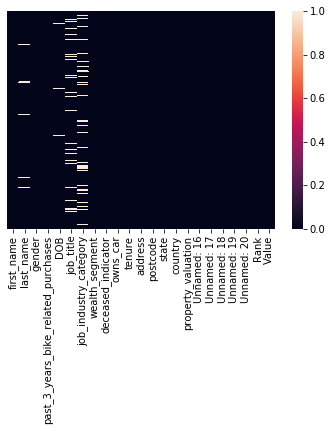

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)

In [16]:
new_df=df.drop(['first_name','last_name'],axis=1)

In [18]:
new_df

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,...,QLD,Australia,6,1.00,1.2500,1.562500,1.328125,1,1,1.718750
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,...,NSW,Australia,11,0.87,0.8700,1.087500,0.924375,1,1,1.718750
2,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,...,VIC,Australia,5,0.81,0.8100,0.810000,0.810000,1,1,1.718750
3,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,...,QLD,Australia,1,0.70,0.8750,0.875000,0.875000,4,4,1.703125
4,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,...,NSW,Australia,9,0.67,0.6700,0.837500,0.837500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,...,NSW,Australia,7,1.10,1.1000,1.100000,1.100000,996,996,0.374000
996,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,...,NSW,Australia,10,0.70,0.7000,0.875000,0.743750,997,997,0.357000
997,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,...,QLD,Australia,2,0.97,1.2125,1.212500,1.212500,997,997,0.357000
998,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,...,QLD,Australia,2,1.07,1.3375,1.337500,1.136875,997,997,0.357000


In [22]:
new_df['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [23]:
gen_dum=pd.get_dummies(new_df['gender'],drop_first=True)

In [24]:
new_df=pd.concat([new_df,gen_dum],axis=1)

In [26]:
new_df.drop('gender',axis=1,inplace=True)

In [32]:
from datetime import datetime

In [37]:
new_df.dtypes

past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                                   float64
Unnamed: 19                                   float64
Unnamed: 20                                     int64
Rank                        

In [45]:
new_df['year'] =new_df['DOB'].apply(lambda dob:dob.year)

In [42]:
new_df['month'] =new_df['DOB'].apply(lambda dob:dob.month)
new_df['day'] =new_df['DOB'].apply(lambda dob:dob.day)

In [48]:
new_df.drop('DOB',axis=1,inplace=True)

In [58]:
new_df.drop(['job_title'],axis=1,inplace=True)

In [74]:
new_df['job_industry_category']=new_df['job_industry_category'].replace(np.nan,'Financial Services')

In [77]:
catdum=pd.get_dummies(new_df['job_industry_category'],drop_first=True)

In [78]:
new_df=pd.concat([new_df,catdum],axis=1)

In [82]:
new_df.drop('job_industry_category',axis=1,inplace=True)

In [83]:
new_df

,past_3_years_bike_related_purchases,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,...,day,year,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
0,86,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,...,12.0,1957.0,0,0,0,0,1,0,0,0
1,69,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,...,22.0,1970.0,0,0,0,0,0,1,0,0
2,10,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,...,28.0,1974.0,0,1,0,0,0,0,0,0
3,64,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,...,28.0,1979.0,0,0,0,0,1,0,0,0
4,34,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,...,21.0,1965.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,...,7.0,1959.0,0,1,0,0,0,0,0,0
996,22,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,...,17.0,2001.0,0,0,1,0,0,0,0,0
997,17,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,...,5.0,1954.0,0,1,0,0,0,0,0,0
998,30,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,...,17.0,1952.0,0,1,0,0,0,0,0,0


In [84]:
new_df.dtypes

past_3_years_bike_related_purchases      int64
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Unnamed: 16                            float64
Unnamed: 17                            float64
Unnamed: 18                            float64
Unnamed: 19                            float64
Unnamed: 20                              int64
Rank                                     int64
Value                                  float64
Male                                     uint8
U                                        uint8
month                                  float64
day                                    float64
year         

In [89]:
new_df['wealth_segment']=new_df['wealth_segment'].map({'Mass Customer':int(1), 'Affluent Customer':int(2), 'High Net Worth':int(3)})

In [90]:
new_df.dtypes

past_3_years_bike_related_purchases      int64
wealth_segment                           int64
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Unnamed: 16                            float64
Unnamed: 17                            float64
Unnamed: 18                            float64
Unnamed: 19                            float64
Unnamed: 20                              int64
Rank                                     int64
Value                                  float64
Male                                     uint8
U                                        uint8
month                                  float64
day                                    float64
year         

In [96]:
new_df.drop('deceased_indicator',axis=1,inplace=True)

In [97]:
new_df.dtypes

past_3_years_bike_related_purchases      int64
wealth_segment                           int64
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Unnamed: 16                            float64
Unnamed: 17                            float64
Unnamed: 18                            float64
Unnamed: 19                            float64
Unnamed: 20                              int64
Rank                                     int64
Value                                  float64
Male                                     uint8
U                                        uint8
month                                  float64
day                                    float64
year                                   float64
Entertainment

In [117]:
new_df['owns_car']=new_df['owns_car'].map({'Yes':int(1),'No':int(0)})

In [119]:
new_df.drop('address',axis=1,inplace=True)

In [125]:
state_dum=pd.get_dummies(new_df['state'],drop_first=True)

In [126]:
new_df=pd.concat([new_df,state_dum],axis=1)

In [128]:
new_df.drop('state',axis=1,inplace=True)

In [136]:
new_df.drop('country',axis=1,inplace=True)

In [137]:
new_df.to_excel('cleaned_newcustomerlist.xlsx')